In [29]:
import numpy as np
import pandas as pd
import cvxpy as cp
import matplotlib.pyplot as plt
from tqdm import tqdm
import statsmodels.api as sm
import scipy.stats as sps

from utils_dopt import *
from utils_plot import *
from utils import dict_list

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Test one shot sampling techniques

## Read in data

In [9]:
D = 10
X = np.load('../data/pca_encoding.npy')[:,:D]
n, d = X.shape
# columns=['index', sample_num', 'operating_cost', 'market_rev', 'runtime'
f = pd.read_csv('../data/combined_basecase.csv', header=None).to_numpy()[:,2]

In [10]:
fscale = StandardScaler().fit_transform(f.reshape(-1,1)).flatten()
Xscale = StandardScaler().fit_transform(X)

## Scale and discretize

In [12]:
# scale and discretize
strategies = ['uniform', 'quantile', 'kmeans']
Xt, __, __ = scale_and_discretize(X, strategies[1], 10)

## Run D-optimal for n in [1,N]

In [31]:
fpreds_dopt = {}
N = 25
n0 = 6

for k in tqdm(range(n0, N)):
    V, l, stats = doptimal(Xt, int(k*2))
    for i, v in stats.items():
        results.add(i,v)
    idxs = get_indices(Xt, V, l, k)
    results.add('n', len(idxs))
    
    Xk = Xscale[idxs]
    fk = fscale[idxs]
    fpred = sm.OLS(fk, sm.add_constant(Xk), hasconst=True).fit().predict(sm.add_constant(Xscale))
    fpreds_dopt[k] = fpred

  0%|                                                    | 0/19 [00:00<?, ?it/s]/Users/etriesch/dev/battery-charger/venv/battery-charger/lib/python3.9/site-packages/cvxpy/problems/problem.py:1385: UserWarning: Solution may be inaccurate. Try another solver, adjusting the solver settings, or solve with verbose=True for more information.
  warnings.warn(
100%|███████████████████████████████████████████| 19/19 [18:20<00:00, 57.94s/it]


## Visualize

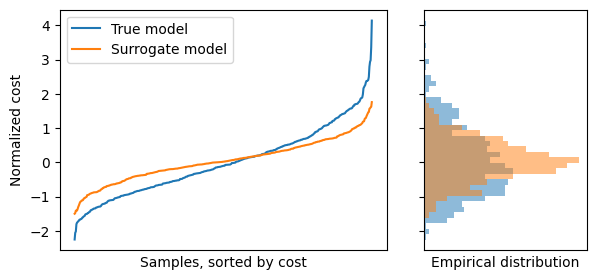

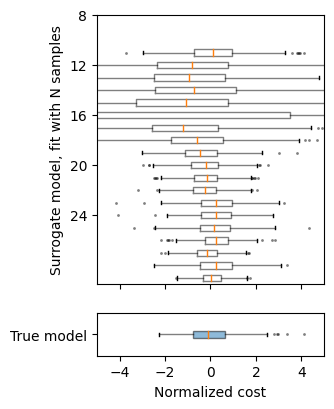

In [84]:
plot_dist(fscale, fpreds_dopt[N-1], bins=40)
plot_boxplots(fscale, fpreds_dopt, xlim=(-5, 5))

# Random sample

In [86]:
fpreds_rand = {}
N = 25
n0 = 3

for k in tqdm(range(n0, N)):
    xk_idxs = np.random.randint(0, len(Xscale)-1, k)
    Xk = Xscale[xk_idxs]
    fk = fscale[xk_idxs]
    fpred = sm.OLS(fk, sm.add_constant(Xk), hasconst=True).fit().predict(sm.add_constant(Xscale))
    fpreds_rand[k] = fpred

100%|█████████████████████████████████████████| 22/22 [00:00<00:00, 1723.18it/s]


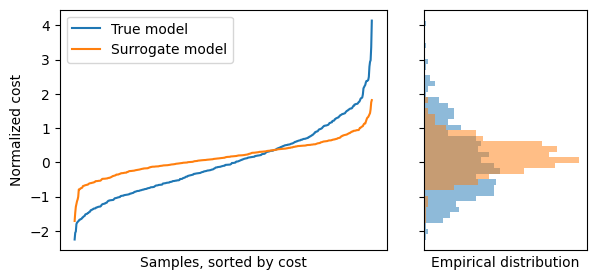

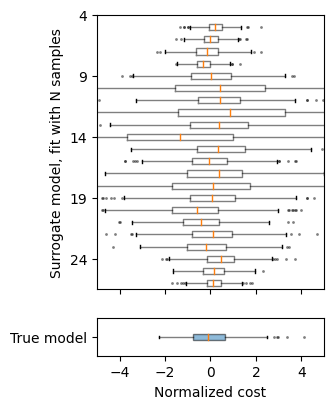

In [87]:
plot_dist(fscale, fpreds_rand[N-1], bins=40)
plot_boxplots(fscale, fpreds_rand, xlim=(-5, 5))